In this project, I built a standard neural network that can classify images of hand gestures (rock, paper, scissors) using the Tensorflow library. The dataset contains 2,188 images of hands in Rock, Paper, and Scissors poses. The images are 300x200 pixels in size and are in color.

In [105]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Paths to the rock, paper, and scissors images folders:

In [106]:
rock_dir = './rock'
paper_dir = './paper'
scissors_dir = './scissors'

Preparing the data by using load_images_labels() function. This function takes the path to the images folder and returns a list of images and a list of labels. In this case, I'm only resizing and applying a full color map to the images.

In [107]:
def load_images_labels(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (30, 30))
            images.append(img)
            labels.append(label)
    return images, labels

rock_images, rock_labels = load_images_labels(rock_dir, 0)
paper_images, paper_labels = load_images_labels(paper_dir, 1)
scissors_images, scissors_labels = load_images_labels(scissors_dir, 2)

X = np.array(rock_images + paper_images + scissors_images)
y = np.array(rock_labels + paper_labels + scissors_labels)

Division into training and test sets is 80% and 20%. The training set is used to train the model, while the test set is used to evaluate the model's performance.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

Normalization of the images is done by dividing each pixel value by 255.0. This ensures that the pixel values are in the range [0,1]. It's done to make the model easier to train.

In [109]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Explanation of layers used to build the model (standard NN architecture):

Flatten is a flattening layer.
- It converts the final feature maps into a one single 1D vector. 
- This is done so that the output can be processed by a fully connected layer.

Dense is a fully connected layer.
- It connects all neurons in the previous layer to the next layer.
- In this example, we have a fully connected layer with 700, 512 and 3 (3-channel output) neurons.
- The activation function used is Rectified Linear Unit (ReLU).

Dropout is a regularization technique.
- It randomly drops neurons during training.
- This helps to prevent overfitting.

The model is compiled using the Adam optimizer and the categorical crossentropy loss function. The Adam optimizer is an extension to stochastic gradient descent. The categorical crossentropy loss function is used for multi-class classification problems.

In [110]:
model = Sequential([
    Flatten(input_shape=(30, 30, 3)), # 30x30x3 = 2700
    Dense(700, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training the model using the fit() function. The model is trained for 10 epochs (iterations over the entire training set).

In [111]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
55/55 [==============================] - 2s 23ms/step - loss: 1.4897 - accuracy: 0.3931 - val_loss: 1.0592 - val_accuracy: 0.5000
Epoch 2/10
55/55 [==============================] - 1s 19ms/step - loss: 0.9351 - accuracy: 0.5474 - val_loss: 0.7882 - val_accuracy: 0.6895
Epoch 3/10
55/55 [==============================] - 1s 20ms/step - loss: 0.8043 - accuracy: 0.6440 - val_loss: 0.6702 - val_accuracy: 0.7420
Epoch 4/10
55/55 [==============================] - 1s 26ms/step - loss: 0.7013 - accuracy: 0.7166 - val_loss: 0.5992 - val_accuracy: 0.8037
Epoch 5/10
55/55 [==============================] - 1s 24ms/step - loss: 0.6811 - accuracy: 0.7069 - val_loss: 0.4939 - val_accuracy: 0.8288
Epoch 6/10
55/55 [==============================] - 1s 22ms/step - loss: 0.6520 - accuracy: 0.7046 - val_loss: 0.5483 - val_accuracy: 0.7900
Epoch 7/10
55/55 [==============================] - 1s 22ms/step - loss: 0.6484 - accuracy: 0.7126 - val_loss: 0.6434 - val_accuracy: 0.7123
Epoch 8/10
55

Plots of the training and validation accuracy and loss.

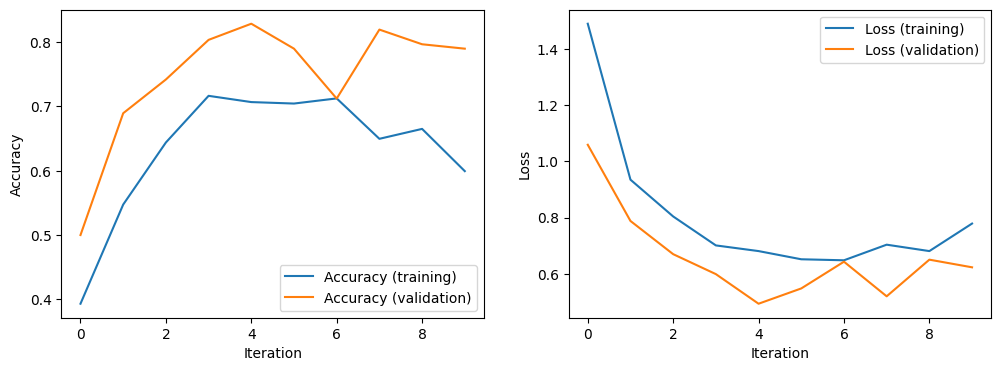

In [112]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

Classification example using the predict() function. The model predicts the class of the image that is displayed. 

14/14 [==============================] - 0s 2ms/step


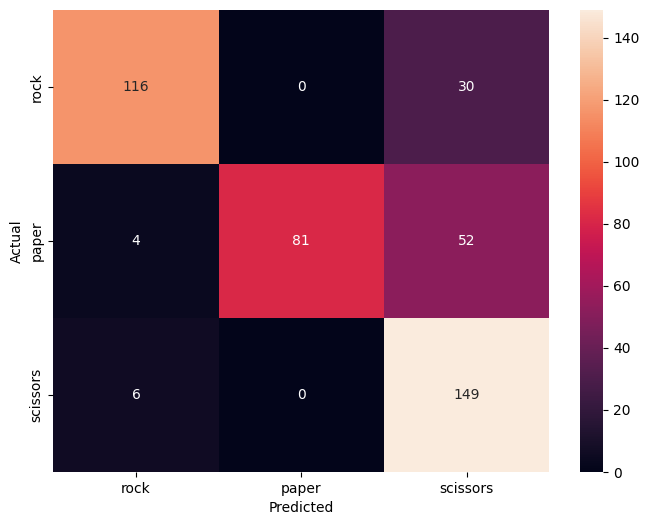

Accuracy:  78.99543378995433 %


In [113]:
labels = ['rock', 'paper', 'scissors']

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
print('Accuracy: ', np.sum(y_pred == y_test) / len(y_test) * 100, '%')

In [114]:
# display misclassified images
# arr = np.where(y_pred != y_test)
# for i in arr[0][:9]:
#     plt.figure(figsize=(4, 4))
#     plt.imshow(X_test[i])
#     plt.title(f"Actual: {labels[y_test[i]]}, Predicted: {labels[y_pred[i]]}")
#     plt.axis('off')
#     plt.show()
#     # save image
#     plt.savefig(f"./mis/{i}.png")

Bibliography:

- https://www.tensorflow.org/api_docs/python/tf/keras/

- https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors